<a href="https://colab.research.google.com/github/danielguinon/TFM/blob/master/TFM_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de números aleatorios con LSTM

TFM

Daniel Guiñón Fort


###  Linear Congruential Generator

Predicción por azar (1000 simulaciones)

In [1]:
import tensorflow as tf
from random import randint, seed
import numpy as np

N = 10000 #Longitud de la secuencia de números pseudo-aleatorios
n = 1000 #Número de simulaciones
s = 1 #semilla

#Linear Congruential Generator

def seedLCG(initVal):
    global rand
    rand = initVal

def lcg():
    a = 1140671485 #Multiplicador
    c = 128201163 #Incremento
    m = 2**24 #módulo
    global rand
    rand = (a*rand + c) % m
    return round(10*rand / m)

seedLCG(s)
    
vector1 = np.array([lcg() for x in range(N)])

accuracies = []
errors = []
E = []

for i in range(n):
    seed(i)
    vector2 = np.array([randint(0,10) for x in range(N)]) #Python's Mersenne Twister
    counter = 0
    for j in range(len(vector1)):
        error = abs(vector1[j] - vector2[j])
        errors.append(error)
        if vector1[j] == vector2[j]:
            counter += 1
    accuracies.append(counter/len(vector1))
    E.append(np.mean(errors))

print(accuracies)
print(np.mean(accuracies)) #Accuracy media
print(E)
print(np.mean(E)) #Error medio

[0.0894, 0.0896, 0.0906, 0.0971, 0.089, 0.0908, 0.0879, 0.0909, 0.0937, 0.0878, 0.0886, 0.0912, 0.089, 0.091, 0.0853, 0.0949, 0.0938, 0.0888, 0.0888, 0.0871, 0.0862, 0.0944, 0.0876, 0.0892, 0.0854, 0.0885, 0.0941, 0.0921, 0.0907, 0.0931, 0.0864, 0.0911, 0.0922, 0.0876, 0.0888, 0.0927, 0.0931, 0.0959, 0.0911, 0.0973, 0.0889, 0.0916, 0.0935, 0.092, 0.0881, 0.0909, 0.087, 0.0915, 0.0908, 0.0894, 0.0948, 0.0925, 0.0944, 0.0929, 0.0936, 0.0918, 0.0904, 0.09, 0.0885, 0.0953, 0.0904, 0.0892, 0.0951, 0.0904, 0.0902, 0.0894, 0.0923, 0.0874, 0.0858, 0.0967, 0.0882, 0.088, 0.0939, 0.0914, 0.0905, 0.087, 0.0932, 0.0886, 0.089, 0.0895, 0.0938, 0.091, 0.0913, 0.0859, 0.0902, 0.0905, 0.0892, 0.0896, 0.088, 0.094, 0.0925, 0.0996, 0.0903, 0.088, 0.0898, 0.0844, 0.0888, 0.0929, 0.0899, 0.09, 0.097, 0.0888, 0.0861, 0.0911, 0.0897, 0.0959, 0.0967, 0.0966, 0.0941, 0.087, 0.0876, 0.0901, 0.0875, 0.0921, 0.0838, 0.0915, 0.0909, 0.0894, 0.092, 0.0925, 0.0919, 0.0924, 0.0908, 0.0953, 0.093, 0.0914, 0.0886, 0.0

Predicción del LCG con LSTM:

In [2]:
import tensorflow as tf
from random import randint, seed
import numpy as np

N = 10000
Nt = round(0.75*N)
n = 10
s = 1

seedLCG(s)
    
vector_full = np.array([lcg() for x in range(N)])
vector = vector_full[0:Nt]
print(vector_full)
print(vector)

sequences, targets = [], []
for i in range(len(vector)):
    try:
        x = vector[i:i+(n-1)]
        y = vector[i+n]
        sequences.append(x)
        targets.append(y)
    except:
        break

inputs_train = np.array(sequences).reshape(Nt-n, n-1, 1)
print(inputs_train)
outputs_train = np.array(targets)
print(outputs_train)

[6 7 1 ... 3 9 1]
[ 6  7  1 ...  2 10  0]
[[[ 6]
  [ 7]
  [ 1]
  ...
  [ 6]
  [ 7]
  [ 7]]

 [[ 7]
  [ 1]
  [ 8]
  ...
  [ 7]
  [ 7]
  [ 9]]

 [[ 1]
  [ 8]
  [ 7]
  ...
  [ 7]
  [ 9]
  [ 6]]

 ...

 [[ 9]
  [ 4]
  [ 0]
  ...
  [10]
  [ 9]
  [ 6]]

 [[ 4]
  [ 0]
  [ 8]
  ...
  [ 9]
  [ 6]
  [ 9]]

 [[ 0]
  [ 8]
  [ 8]
  ...
  [ 6]
  [ 9]
  [ 2]]]
[ 6  2  6 ...  2 10  0]


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten

model1 = Sequential()
model1.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n-1, 1)))
model1.add(LSTM(100, activation='relu', return_sequences=True))
model1.add(LSTM(50, activation='relu', return_sequences=True))
model1.add(LSTM(25, activation='relu', return_sequences =True))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
print(model1.summary())

history = model1.fit(inputs_train, outputs_train, epochs=500, validation_split=0.2, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 100)            120400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 50)             30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 9, 25)             7600      
_________________________________________________________________
dense (Dense)                (None, 9, 20)             520       
_________________________________________________________________
dense_1 (Dense)              (None, 9, 10)             210       
_________________________________________________________________
flatten (Flatten)            (None, 90)                0

In [4]:
vector = vector_full[Nt:N]
sequences, targets = [], []

for i in range(len(vector)):
    try:
        x = vector[i:i+(n-1)]
        y = vector[i+n]
        sequences.append(x)
        targets.append(y)
    except:
        break

inputs_test = np.array(sequences).reshape((N-Nt)-n, n-1, 1)
target_test = np.array(targets)

outputs_test = model1.predict(inputs_test, verbose=2)

print(inputs_test)
print(target_test)
print(outputs_test)
print(target_test)

78/78 - 1s
[[[ 1]
  [ 4]
  [ 0]
  ...
  [ 7]
  [ 1]
  [ 6]]

 [[ 4]
  [ 0]
  [ 4]
  ...
  [ 1]
  [ 6]
  [ 3]]

 [[ 0]
  [ 4]
  [10]
  ...
  [ 6]
  [ 3]
  [10]]

 ...

 [[ 3]
  [ 7]
  [ 2]
  ...
  [ 3]
  [ 9]
  [10]]

 [[ 7]
  [ 2]
  [ 0]
  ...
  [ 9]
  [10]
  [ 2]]

 [[ 2]
  [ 0]
  [ 3]
  ...
  [10]
  [ 2]
  [ 3]]]
[10  0  8 ...  3  9  1]
[[6.898413 ]
 [3.7915127]
 [3.8849378]
 ...
 [3.4711528]
 [5.6105967]
 [8.508683 ]]
[10  0  8 ...  3  9  1]


Error

In [5]:
errors = []
for i in range(len(target_test)):
    error = abs(target_test[i] - outputs_test[i])
    errors.append(error)
print(errors)
print(sum(errors)/len(target_test))

[array([3.1015868], dtype=float32), array([3.7915127], dtype=float32), array([4.115062], dtype=float32), array([4.606345], dtype=float32), array([5.185115], dtype=float32), array([2.2225778], dtype=float32), array([5.6953297], dtype=float32), array([1.7704911], dtype=float32), array([2.2117887], dtype=float32), array([0.515044], dtype=float32), array([3.6329942], dtype=float32), array([1.3676009], dtype=float32), array([3.9313984], dtype=float32), array([3.5492473], dtype=float32), array([2.0367389], dtype=float32), array([5.975306], dtype=float32), array([1.687819], dtype=float32), array([3.3074975], dtype=float32), array([0.2316773], dtype=float32), array([4.0689926], dtype=float32), array([3.7065678], dtype=float32), array([2.5928497], dtype=float32), array([4.5691943], dtype=float32), array([7.9285555], dtype=float32), array([0.29141808], dtype=float32), array([6.4135523], dtype=float32), array([4.6528873], dtype=float32), array([5.572208], dtype=float32), array([2.7798915], dtype=

Accuracy

In [6]:
digits = np.round(outputs_test)
print(digits)
print(targets)
counter = 0
for i in range(len(targets)):
    if targets[i] == digits[i]:
        counter += 1
print(counter/len(targets))

[[7.]
 [4.]
 [4.]
 ...
 [3.]
 [6.]
 [9.]]
[10, 0, 8, 3, 7, 1, 9, 2, 8, 4, 10, 8, 1, 4, 2, 0, 6, 2, 3, 2, 5, 4, 9, 10, 7, 1, 1, 8, 9, 9, 4, 7, 9, 5, 8, 1, 9, 4, 2, 6, 8, 8, 3, 5, 2, 9, 9, 1, 5, 2, 7, 3, 6, 4, 2, 1, 1, 1, 7, 3, 6, 2, 8, 3, 1, 3, 10, 7, 8, 4, 5, 5, 0, 9, 8, 1, 7, 6, 2, 7, 8, 6, 5, 9, 8, 4, 9, 3, 2, 3, 1, 8, 5, 4, 6, 9, 7, 4, 6, 2, 1, 6, 6, 3, 5, 6, 6, 8, 1, 0, 8, 7, 3, 2, 8, 10, 6, 7, 8, 4, 10, 5, 4, 5, 10, 0, 7, 2, 6, 7, 9, 9, 3, 4, 2, 9, 1, 8, 0, 8, 8, 4, 5, 7, 3, 9, 9, 8, 5, 8, 5, 0, 5, 7, 1, 6, 6, 4, 8, 8, 8, 0, 2, 8, 9, 1, 0, 7, 1, 5, 4, 3, 5, 3, 1, 3, 7, 6, 2, 4, 2, 0, 10, 8, 9, 8, 3, 2, 10, 9, 6, 3, 5, 4, 7, 2, 5, 3, 0, 5, 3, 5, 1, 3, 6, 1, 4, 1, 5, 3, 9, 1, 1, 9, 9, 4, 0, 7, 4, 5, 5, 10, 9, 3, 7, 6, 9, 2, 5, 2, 9, 0, 9, 8, 2, 1, 8, 1, 0, 9, 7, 8, 3, 9, 7, 8, 1, 4, 1, 4, 6, 6, 9, 0, 6, 7, 3, 7, 8, 9, 6, 4, 4, 8, 9, 2, 1, 8, 4, 8, 9, 2, 5, 1, 6, 1, 6, 0, 4, 6, 9, 6, 3, 7, 5, 5, 4, 10, 5, 5, 9, 5, 2, 1, 3, 5, 2, 7, 0, 6, 2, 5, 8, 8, 8, 1, 2, 7, 3, 1, 4, 5, 7, 3, 6, 9

78/78 [==============================] - 1s 13ms/step - loss: 1.6218e-13 - accuracy: 0.0000e+00
loss 1.6218156104110676e-13 accuracy 0.0


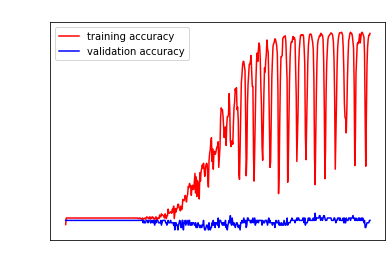

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

loss,accuracy = model1.evaluate(inputs_test,outputs_test)
print('loss {} accuracy {}'.format(loss,accuracy))

#plot accuracy
epochs = np.arange(1,len(history.history['accuracy'])+1)
plt.title('Accuracy over training').set_color('white')
plt.xlabel('epoch').set_color('white')
plt.ylabel('accuracy').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.plot(epochs,history.history['accuracy'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_accuracy'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

20 réplicas con distinta seed para calcular la media empíricamente

In [5]:
n = 10

def bucle():

    accuracies = []

    for s in range(20):
        N = 10000
        Nt = round(0.75*N)
        n = 10

        seedLCG(s)
    
        vector_full = np.array([lcg() for x in range(N)])
        vector = vector_full[0:Nt]

        sequences, targets = [], []
        for i in range(len(vector)):
            try:
                x = vector[i:i+(n-1)]
                y = vector[i+n]
                sequences.append(x)
                targets.append(y)
            except:
                break

        inputs_train = np.array(sequences).reshape(Nt-n, n-1, 1)
        outputs_train = np.array(targets)
      
        history = model1.fit(inputs_train, outputs_train, epochs=450, validation_split=0.2, verbose=0)
      
        vector = vector_full[Nt:N]
        sequences, targets = [], []

        for i in range(len(vector)):
            try:
                x = vector[i:i+(n-1)]
                y = vector[i+n]
                sequences.append(x)
                targets.append(y)
            except:
                break

        inputs_test = np.array(sequences).reshape((N-Nt)-n, n-1, 1)
        target_test = np.array(targets)
        outputs_test = model1.predict(inputs_test, verbose=0)

        digits = np.round(outputs_test)

        counter = 0
        for i in range(len(targets)):
            if targets[i] == digits[i]:
                counter += 1
        accuracies.append(counter/len(targets))
        
    return accuracies

print(bucle())

[0.09718875502008033, 0.10361445783132531, 0.08674698795180723, 0.10481927710843374, 0.10522088353413654, 0.09959839357429719, 0.10120481927710843, 0.0859437751004016, 0.10361445783132531, 0.09598393574297188, 0.09598393574297188, 0.09236947791164658, 0.09558232931726908, 0.10240963855421686, 0.10321285140562249, 0.10080321285140562, 0.09959839357429719, 0.10522088353413654, 0.10160642570281124, 0.10200803212851406]


In [6]:
np.mean([0.09718875502008033, 0.10361445783132531, 0.08674698795180723, 0.10481927710843374, 0.10522088353413654, 0.09959839357429719, 0.10120481927710843, 0.0859437751004016, 0.10361445783132531, 0.09598393574297188, 0.09598393574297188, 0.09236947791164658, 0.09558232931726908, 0.10240963855421686, 0.10321285140562249, 0.10080321285140562, 0.09959839357429719, 0.10522088353413654, 0.10160642570281124, 0.10200803212851406])

0.09913654618473897

Predicción del MT con LSTM

In [10]:
N = 10000
Nt = round(0.75*N)
n = 10
s = 1

seed(s)
vector_full = np.array([randint(0,9) for x in range(N)])
vector = vector_full[0:Nt]

sequences, targets = [], []
for i in range(len(vector)):
    try:
        x = vector[i:i+(n-1)]
        y = vector[i+n]
        sequences.append(x)
        targets.append(y)
    except:
        break

inputs_train = np.array(sequences).reshape(Nt-n, n-1, 1)
print(inputs_train)
outputs_train = np.array(targets)
print(outputs_train)

[[[2]
  [9]
  [1]
  ...
  [7]
  [7]
  [6]]

 [[9]
  [1]
  [4]
  ...
  [7]
  [6]
  [3]]

 [[1]
  [4]
  [1]
  ...
  [6]
  [3]
  [1]]

 ...

 [[4]
  [6]
  [4]
  ...
  [8]
  [9]
  [2]]

 [[6]
  [4]
  [8]
  ...
  [9]
  [2]
  [0]]

 [[4]
  [8]
  [2]
  ...
  [2]
  [0]
  [9]]]
[1 7 0 ... 9 0 6]


In [11]:
model2 = Sequential()
model2.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(n-1, 1)))
model2.add(LSTM(200, activation='relu', return_sequences=True))
model2.add(LSTM(100, activation='relu', return_sequences=True))
model2.add(LSTM(50, activation='relu', return_sequences=True))
model2.add(LSTM(25, activation='relu', return_sequences = True))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
print(model2.summary())

history = model2.fit(inputs_train, outputs_train, epochs=450, validation_split=0.2, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 9, 500)            1004000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 9, 200)            560800    
_________________________________________________________________
lstm_6 (LSTM)                (None, 9, 100)            120400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 9, 50)             30200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 9, 25)             7600      
_________________________________________________________________
dense_3 (Dense)              (None, 9, 20)             520       
_________________________________________________________________
dense_4 (Dense)              (None, 9, 10)            

In [12]:
seed(1)

vector = vector_full[Nt:N]
sequences, targets = [], []

for i in range(len(vector)):
    try:
        x = vector[i:i+(n-1)]
        y = vector[i+n]
        sequences.append(x)
        targets.append(y)
    except:
        break

inputs_test = np.array(sequences).reshape((N-Nt)-n, n-1, 1)
target_test = np.array(targets)

outputs_test = model2.predict(inputs_test, verbose=2)

print(inputs_test)
print(target_test)
print(outputs_test)
print(target_test)

78/78 - 3s
[[[3]
  [3]
  [7]
  ...
  [2]
  [8]
  [4]]

 [[3]
  [7]
  [1]
  ...
  [8]
  [4]
  [8]]

 [[7]
  [1]
  [0]
  ...
  [4]
  [8]
  [7]]

 ...

 [[7]
  [3]
  [6]
  ...
  [2]
  [0]
  [3]]

 [[3]
  [6]
  [0]
  ...
  [0]
  [3]
  [5]]

 [[6]
  [0]
  [0]
  ...
  [3]
  [5]
  [5]]]
[7 2 9 ... 5 1 6]
[[2.3507428]
 [2.3851397]
 [5.7073126]
 ...
 [2.246781 ]
 [5.573174 ]
 [7.9870243]]
[7 2 9 ... 5 1 6]


Error

In [13]:
errors = []
for i in range(len(target_test)):
    error = abs(target_test[i] - outputs_test[i])
    errors.append(error)
print(errors)
print(sum(errors)/len(target_test))

[array([4.649257], dtype=float32), array([0.3851397], dtype=float32), array([3.2926874], dtype=float32), array([2.1473808], dtype=float32), array([3.739672], dtype=float32), array([4.9032288], dtype=float32), array([0.7615266], dtype=float32), array([3.3200026], dtype=float32), array([1.2846887], dtype=float32), array([1.6049595], dtype=float32), array([2.1500936], dtype=float32), array([6.2888207], dtype=float32), array([0.5076418], dtype=float32), array([5.9498014], dtype=float32), array([2.965312], dtype=float32), array([2.393641], dtype=float32), array([2.478148], dtype=float32), array([2.9135456], dtype=float32), array([7.2632236], dtype=float32), array([5.3599677], dtype=float32), array([5.215331], dtype=float32), array([0.07779026], dtype=float32), array([3.6126764], dtype=float32), array([5.5736666], dtype=float32), array([1.8430071], dtype=float32), array([2.0903397], dtype=float32), array([1.4542925], dtype=float32), array([0.23115158], dtype=float32), array([2.8267846], dtyp

Accuracy

In [14]:
digits = np.round(outputs_test)
counter = 0
for i in range(len(targets)):
    if targets[i] == digits[i]:
        counter += 1
print(counter/len(targets))

0.1


78/78 [==============================] - 3s 37ms/step - loss: 9.5921e-14 - accuracy: 0.0000e+00
loss 9.59205927035002e-14 accuracy 0.0


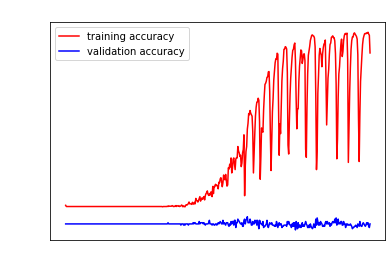

In [15]:
%matplotlib inline

loss,accuracy = model2.evaluate(inputs_test,outputs_test)
print('loss {} accuracy {}'.format(loss,accuracy))

#plot accuracy
epochs = np.arange(1,len(history.history['accuracy'])+1)
plt.title('Accuracy over training').set_color('white')
plt.xlabel('epoch').set_color('white')
plt.ylabel('accuracy').set_color('white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.plot(epochs,history.history['accuracy'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_accuracy'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

Modelo LSTM Bidireccional

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, Bidirectional, Flatten

# model2 = Sequential()

# forward_layer0 = LSTM(200, return_sequences=True)
# backward_layer0 = LSTM(200, activation='relu', return_sequences=True,
#                        go_backwards=True)
# model2.add(Bidirectional(forward_layer0, backward_layer=backward_layer0,
#                          input_shape=(n-1,1)))
# forward_layer1 = LSTM(100, return_sequences=True)
# backward_layer1 = LSTM(100, activation='relu', return_sequences=True,
#                        go_backwards=True)
# forward_layer4 = LSTM(50, return_sequences=True)
# backward_layer4 = LSTM(50, activation='relu', return_sequences=True,
#                        go_backwards=True)
# model2.add(Bidirectional(forward_layer4, backward_layer=backward_layer4))
# model2.add(Dense(20, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# # model2.add(Dropout(0.5))
# model2.add(Flatten())
# model2.add(Dense(1))
# model2.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

# history = model2.fit(inputs_train, outputs_train, epochs=400, validation_split=0.2, verbose=2)